In [1]:
#!pip install spacy

# Preprocessing, Local & Global Counting (1-gram and 2-gram)

In [2]:
import numpy as np
import json
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
import operator
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
from IPython.display import display
# NER
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
file_list = glob.glob('./dialogues/*')

In [4]:
file_list

['./dialogues/ORDER_PIZZA.txt',
 './dialogues/PHONE_PLAN_BOT.txt',
 './dialogues/CONTACT_MANAGER.txt',
 './dialogues/CHECK_STATUS.txt',
 './dialogues/CITY_INFO.txt',
 './dialogues/AUTO_SORT.txt',
 './dialogues/PROMPT_GENERATOR.txt',
 './dialogues/GEOGRAPHY.txt',
 './dialogues/UPDATE_CALENDAR.txt',
 './dialogues/DECIDER_BOT.txt',
 './dialogues/APARTMENT_FINDER.txt',
 './dialogues/GUINESS_CHECK.txt',
 './dialogues/AGREEMENT_BOT.txt',
 './dialogues/WEATHER_CHECK.txt',
 './dialogues/PLAY_TIMES.txt',
 './dialogues/EVENT_RESERVE.txt',
 './dialogues/NAME_SUGGESTER.txt',
 './dialogues/LIBRARY_REQUEST.txt',
 './dialogues/BUS_SCHEDULE_BOT.txt',
 './dialogues/MOVIE_LISTINGS.txt',
 './dialogues/LOOK_UP_INFO.txt',
 './dialogues/APPOINTMENT_REMINDER.txt',
 './dialogues/SPORTS_INFO.txt',
 './dialogues/POLICY_BOT.txt',
 './dialogues/QUOTE_OF_THE_DAY_BOT.txt',
 './dialogues/PHONE_SETTINGS.txt',
 './dialogues/WHAT_IS_IT.txt',
 './dialogues/WEDDING_PLANNER.txt',
 './dialogues/GAME_RULES.txt',
 './dialogu

In [5]:
local_preprocessed_text_map = {}
global_preprocessed_text_list = []
local_word_counter_1gram = {}
local_word_counter_2gram = {}
global_word_counter_1gram = {}
global_word_counter_2gram = {}

file_count = 1

In [6]:
POS_LIST = ['NN', 'VB', 'JJ', 'FW', 'CD', 'PB', 'PRP', 'PDT']

In [7]:
for file in file_list:
    split_file = file.split('/')
    print(file_count)
    print(split_file[2])
    
    count_word_map_1gram = {}
    count_word_map_2gram = {}
    sentence_list = []
    with open(file, mode='r', encoding='utf-8') as file:
        while True:
            #print('start')
            line = file.readline()
            
            try:
                # load_json
                json_data_list = json.loads(line)
                #print(json_data["turns"])
            except ValueError:
                #print('error')
                print(line)
            
            for json_data in json_data_list["turns"]:
                #print(json_data)
                
                # remove sentence signs
                json_data = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', json_data)
                
                # tokenize into words
                tokens = [word for sent in nltk.sent_tokenize(json_data) for word in nltk.word_tokenize(sent)]

                # remove stopwords
                stop = stopwords.words('english')
                tokens = [token for token in tokens if token not in stop]

                # remove words less than three letters
                #tokens = [word for word in tokens if len(word) >= 3]

                # lower capitalization
                tokens = [word.lower() for word in tokens]
                
                # POS Tagging
                tokens = nltk.pos_tag(tokens)
                
                pos_tokens = []
                for token in tokens:
                    if token[1] in POS_LIST:
                        pos_tokens.append(token[0])

                # lemmatization
                lmtzr = WordNetLemmatizer()
                tokens = [lmtzr.lemmatize(word) for word in pos_tokens]
                tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]

                # stemming
                stemmer = PorterStemmer()
                tokens = [ stemmer.stem(word) for word in tokens ]
                
                preprocessed_text= ' '.join(tokens)
                
                # Local processed sentence
                sentence_list.append(preprocessed_text)
                
                # Global processed sentence
                global_preprocessed_text_list.append(preprocessed_text)
                #print(preprocessed_text)
                
                # Local counting (1-gram)
                for token in tokens:
                    if token not in count_word_map_1gram.keys():
                        count_word_map_1gram[token] = 1
                    else:
                        count_word_map_1gram[token] = count_word_map_1gram[token] + 1
                        
                # Global counting (1-gram)
                for token in tokens:
                    if token not in global_word_counter_1gram.keys():
                        global_word_counter_1gram[token] = 1
                    else:
                        global_word_counter_1gram[token] = global_word_counter_1gram[token] + 1
                
                len_tokens = len(tokens)
                
                # Local counting (2-gram)
                for count in range(1, len_tokens + 1):
                    if count < len_tokens:
                        tokens_2gram = tokens[count - 1] + "-" + tokens[count]
                        if tokens_2gram not in count_word_map_2gram.keys():
                            count_word_map_2gram[tokens_2gram] = 1
                        else:
                            count_word_map_2gram[tokens_2gram] = count_word_map_2gram[tokens_2gram] + 1
                            
                # Global counting (2-gram)
                for count in range(1, len_tokens + 1):
                    if count < len_tokens:
                        tokens_2gram = tokens[count - 1] + "-" + tokens[count]
                        if tokens_2gram not in global_word_counter_2gram.keys():
                            global_word_counter_2gram[tokens_2gram] = 1
                        else:
                            global_word_counter_2gram[tokens_2gram] = global_word_counter_2gram[tokens_2gram] + 1
                            
            if not line:
                # Local counting (1-gram)
                local_word_counter_1gram[split_file[2]] = count_word_map_1gram
                # Local counting (2-gram)
                local_word_counter_2gram[split_file[2]] = count_word_map_2gram
                # Local sentence (1-gram)
                local_preprocessed_text_map[split_file[2]] = sentence_list
                
                file_count = file_count + 1
                break

1
ORDER_PIZZA.txt

2
PHONE_PLAN_BOT.txt

3
CONTACT_MANAGER.txt

4
CHECK_STATUS.txt

5
CITY_INFO.txt

6
AUTO_SORT.txt

7
PROMPT_GENERATOR.txt

8
GEOGRAPHY.txt

9
UPDATE_CALENDAR.txt

10
DECIDER_BOT.txt

11
APARTMENT_FINDER.txt

12
GUINESS_CHECK.txt

13
AGREEMENT_BOT.txt

14
WEATHER_CHECK.txt

15
PLAY_TIMES.txt

16
EVENT_RESERVE.txt

17
NAME_SUGGESTER.txt

18
LIBRARY_REQUEST.txt

19
BUS_SCHEDULE_BOT.txt

20
MOVIE_LISTINGS.txt

21
LOOK_UP_INFO.txt

22
APPOINTMENT_REMINDER.txt

23
SPORTS_INFO.txt

24
POLICY_BOT.txt

25
QUOTE_OF_THE_DAY_BOT.txt

26
PHONE_SETTINGS.txt

27
WHAT_IS_IT.txt

28
WEDDING_PLANNER.txt

29
GAME_RULES.txt

30
CATALOGUE_BOT.txt

31
STORE_DETAILS.txt

32
SHOPPING.txt

33
UPDATE_CONTACT.txt

34
INSURANCE.txt

35
ALARM_SET.txt

36
RESTAURANT_PICKER.txt

37
TIME_ZONE.txt

38
HOME_BOT.txt

39
EDIT_PLAYLIST.txt

40
MUSIC_SUGGESTER.txt

41
PET_ADVICE.txt

42
BANK_BOT.txt

43
PRESENT_IDEAS.txt

44
HOW_TO_BASIC.txt

45
SKI_BOT.txt

46
SCAM_LOOKUP.txt

47
MAKE_RESTAURANT_RESERVA

- local counting (1-gram)

In [8]:
# value 기준 sorting
sorted_value = sorted(local_word_counter_1gram['WHAT_IS_IT.txt'].items(), key=operator.itemgetter(1))
sorted_value.reverse()

In [9]:
len(sorted_value)

1692

In [10]:
sorted_value

[('i', 2689),
 ('help', 1743),
 ('rememb', 925),
 ('hello', 842),
 ('book', 759),
 ('movi', 646),
 ('song', 572),
 ('time', 425),
 ('dick', 410),
 ('mountain', 389),
 ('parti', 354),
 ('im', 354),
 ('someth', 347),
 ('mobi', 342),
 ('sure', 338),
 ('whale', 324),
 ('anyth', 280),
 ('it', 268),
 ('name', 267),
 ('guy', 265),
 ('thing', 235),
 ('one', 220),
 ('your', 212),
 ('do', 209),
 ('ok', 206),
 ('okay', 206),
 ('lord', 206),
 ('murphi', 199),
 ('hunt', 198),
 ('know', 184),
 ('sorri', 165),
 ('think', 162),
 ('throw', 161),
 ('thank', 161),
 ('great', 155),
 ('girlfriend', 152),
 ('welcom', 151),
 ('eddi', 149),
 ('tell', 131),
 ('you', 131),
 ('titl', 130),
 ('pleas', 129),
 ('give', 126),
 ('day', 124),
 ('descript', 108),
 ('hi', 107),
 ('inform', 106),
 ('need', 99),
 ('problem', 96),
 ('dont', 94),
 ('glad', 85),
 ('good', 84),
 ('right', 68),
 ('yeah', 67),
 ('hmm', 67),
 ('have', 63),
 ('much', 63),
 ('let', 63),
 ('cant', 61),
 ('question', 60),
 ('find', 60),
 ('provid', 

In [11]:
# value 기준 sorting
sorted_value = sorted(local_word_counter_1gram['CONTACT_MANAGER.txt'].items(), key=operator.itemgetter(1))
sorted_value.reverse()

In [12]:
len(sorted_value)

3272

In [13]:
sorted_value

[('i', 3975),
 ('contact', 3511),
 ('help', 2586),
 ('number', 2252),
 ('hello', 1539),
 ('add', 1455),
 ('like', 1301),
 ('email', 1192),
 ('phone', 1062),
 ('name', 1030),
 ('chang', 1004),
 ('new', 927),
 ('pleas', 827),
 ('sure', 743),
 ('address', 733),
 ('okay', 728),
 ('one', 721),
 ('ok', 657),
 ('delet', 649),
 ('anyth', 550),
 ('edit', 417),
 ('thank', 414),
 ('john', 391),
 ('smith', 373),
 ('want', 317),
 ('second', 302),
 ('eras', 302),
 ('great', 292),
 ('you', 275),
 ('welcom', 251),
 ('your', 236),
 ('manag', 235),
 ('day', 229),
 ('ive', 218),
 ('need', 188),
 ('updat', 166),
 ('list', 163),
 ('hi', 155),
 ('alright', 150),
 ('good', 145),
 ('replac', 142),
 ('today', 141),
 ('current', 134),
 ('inform', 133),
 ('work', 131),
 ('cell', 127),
 ('home', 123),
 ('have', 114),
 ('open', 106),
 ('old', 104),
 ('problem', 102),
 ('im', 96),
 ('last', 95),
 ('id', 93),
 ('do', 91),
 ('bob', 87),
 ('make', 86),
 ('scott', 85),
 ('joe', 83),
 ('nice', 82),
 ('creat', 77),
 ('co

- global counting (1-gram)

In [14]:
# value 기준 sorting
sorted_value = sorted(global_word_counter_1gram.items(), key=operator.itemgetter(1))
sorted_value.reverse()

In [15]:
len(sorted_value)

25809

In [16]:
sorted_value

[('i', 111727),
 ('help', 65748),
 ('hello', 40381),
 ('like', 17102),
 ('okay', 15604),
 ('sure', 14729),
 ('ok', 14123),
 ('pleas', 12503),
 ('anyth', 12116),
 ('time', 11074),
 ('great', 10968),
 ('one', 10960),
 ('thank', 10851),
 ('you', 9986),
 ('im', 8809),
 ('day', 8245),
 ('number', 7790),
 ('good', 7724),
 ('know', 7107),
 ('welcom', 7092),
 ('your', 6800),
 ('meet', 6566),
 ('it', 6439),
 ('inform', 6233),
 ('need', 5570),
 ('name', 5568),
 ('alarm', 5451),
 ('today', 5451),
 ('contact', 5315),
 ('game', 5110),
 ('hi', 5029),
 ('chang', 4857),
 ('new', 4826),
 ('sorri', 4817),
 ('question', 4691),
 ('check', 4595),
 ('much', 4275),
 ('book', 4266),
 ('problem', 3819),
 ('do', 3785),
 ('want', 3731),
 ('someth', 3705),
 ('phone', 3659),
 ('pm', 3649),
 ('tell', 3587),
 ('add', 3460),
 ('order', 3459),
 ('email', 3427),
 ('polici', 3377),
 ('get', 3118),
 ('world', 3116),
 ('play', 3109),
 ('person', 3108),
 ('2', 3098),
 ('room', 3052),
 ('insur', 2988),
 ('week', 2883),
 ('a

- local counting (2-gram)

In [17]:
# value 기준 sorting
sorted_value = sorted(local_word_counter_2gram['CONTACT_MANAGER.txt'].items(), key=operator.itemgetter(1))
sorted_value.reverse()

In [18]:
len(sorted_value)

8318

In [19]:
sorted_value

[('i-help', 1755),
 ('hello-i', 1499),
 ('phone-number', 824),
 ('email-address', 543),
 ('new-contact', 521),
 ('like-add', 336),
 ('add-new', 269),
 ('like-chang', 238),
 ('contact-like', 238),
 ('i-add', 231),
 ('number-contact', 226),
 ('i-like', 218),
 ('add-second', 210),
 ('add-email', 210),
 ('your-welcom', 192),
 ('contact-name', 188),
 ('i-contact', 184),
 ('name-contact', 174),
 ('okay-i', 167),
 ('i-chang', 163),
 ('edit-contact', 163),
 ('chang-name', 161),
 ('second-number', 137),
 ('like-edit', 137),
 ('john-smith', 130),
 ('address-contact', 126),
 ('sure-i', 117),
 ('new-number', 114),
 ('chang-email', 113),
 ('pleas-add', 106),
 ('delet-contact', 104),
 ('anyth-help', 103),
 ('help-manag', 102),
 ('add-contact', 100),
 ('one-email', 100),
 ('eras-contact', 97),
 ('want-add', 94),
 ('new-one', 91),
 ('email-contact', 91),
 ('contact-number', 85),
 ('ok-i', 85),
 ('number-like', 85),
 ('last-name', 84),
 ('contact-list', 82),
 ('second-phone', 82),
 ('like-eras', 82),
 

- global counting (2-gram)

In [20]:
# value 기준 sorting
sorted_value = sorted(global_word_counter_2gram.items(), key=operator.itemgetter(1))
sorted_value.reverse()

In [21]:
len(sorted_value)

201407

In [22]:
sorted_value

[('i-help', 44416),
 ('hello-i', 38278),
 ('your-welcom', 5114),
 ('i-like', 3538),
 ('okay-i', 2892),
 ('like-know', 2669),
 ('sure-i', 2651),
 ('anyth-help', 2621),
 ('im-sorri', 2609),
 ('i-question', 2303),
 ('hi-i', 2012),
 ('i-i', 1972),
 ('good-day', 1814),
 ('great-day', 1654),
 ('need-help', 1599),
 ('new-york', 1534),
 ('nice-day', 1534),
 ('ok-i', 1491),
 ('phone-number', 1370),
 ('sure-thing', 1306),
 ('march-24th', 1244),
 ('like-chang', 1142),
 ('time-zone', 1109),
 ('help-anyth', 1084),
 ('sorri-i', 1081),
 ('i-know', 1031),
 ('thank-much', 1000),
 ('anyth-i', 971),
 ('have-nice', 953),
 ('i-dont', 937),
 ('let-check', 911),
 ('thank-help', 861),
 ('i-chang', 858),
 ('email-address', 842),
 ('i-one', 841),
 ('great-thank', 823),
 ('have-good', 817),
 ('ok-thank', 803),
 ('i-inform', 792),
 ('i-guess', 786),
 ('help-today', 779),
 ('great-i', 775),
 ('world-record', 727),
 ('like-add', 724),
 ('have-great', 721),
 ('health-insur', 720),
 ('meet-march', 704),
 ('account-nu

- local sentence

In [23]:
local_preprocessed_text_map['CONTACT_MANAGER.txt']

['hello i help',
 'hello i help manag',
 'need',
 'pleas delet one phone',
 'name contact',
 'name',
 'last name',
 'last name',
 'delet number phone sure',
 'sure',
 'okay i number',
 'thank',
 'you',
 'hello i help',
 'need updat contact',
 'contact like updat',
 'david',
 'like updat',
 'id add email address djonesgmailcom',
 'david we one email address contact like eras creat new contact',
 'get rid old email pleas',
 'great i email contact',
 'thank much',
 'your welcom',
 'hello i help',
 'edit contact',
 'sure thing like edit',
 'id chang name',
 'name like edit',
 'john doe',
 'i edit john doe like chang name',
 'chang john deer',
 'problem i contact john doe john deer anyth like today',
 'add contact speed dial',
 'i i contact john dial today',
 'perfect',
 'hello i help',
 'eras contact',
 'i eras contact name',
 'gari glitter',
 'sure wish eras contact',
 'i get ahold',
 '',
 'fine i need',
 'anyth',
 '',
 'have great day',
 'hello i help',
 'edit contact',
 'sure contact li

In [24]:
len(local_preprocessed_text_map['CONTACT_MANAGER.txt'])

16898

- global sentence

In [25]:
global_preprocessed_text_list

['hello i help',
 'order pizza need help',
 'like add order',
 'i pizza mushroom pepperoni bacon',
 'locat bacon top differ youd replac',
 'pineappl',
 'avail ive pizza mushroom pepperoni pineappl order size like',
 'medium',
 'alright like add order',
 '',
 'total 1499 pizza readi pickup 20',
 'hello i help',
 'place order',
 'okay',
 'i 2 larg chees pizza small pepperoni pizza pleas',
 'okay order like',
 'total order',
 '18 total',
 'great readi',
 '30',
 '',
 'your welcom',
 'hello i help',
 'i make inquiri pizza',
 'i like know',
 'spinach avail',
 'im sorri spinach time',
 'oh back',
 'we menu add wider varieti veget',
 'good lettuc',
 'we',
 'goodby thank',
 'have great day',
 'help',
 'place new order pleas',
 'problem mani like',
 'ok i larg pizza order',
 'sure thing anyth',
 'ill order',
 'mani like order',
 'one',
 'order total 300 anyth',
 'check long readi',
 'pleas wait 15 20 deliveri',
 'hello i help',
 'i order pizza',
 'mani',
 'three',
 '',
 'three differ',
 'ok plea

In [26]:
len(global_preprocessed_text_list)

432561

# Local & Global TF-IDF (1-gram and 2-gram)

In [27]:
max_features = 800

- global TF-IDF

In [28]:
global_df = pd.DataFrame(global_preprocessed_text_list, columns =['preprocessed_text'])

In [29]:
global_df

,preprocessed_text
0,hello i help
1,order pizza need help
2,like add order
3,i pizza mushroom pepperoni bacon
4,locat bacon top differ youd replac
...,...
432556,4 16 total
432557,i 4 3 steakhous
432558,great
432559,do anyth


    -  1-gram

In [30]:
word_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1, 1))
vz_word = word_vectorizer.fit_transform(global_df['preprocessed_text'])

global_word_tfidf_1gram = dict(zip(word_vectorizer.get_feature_names(), word_vectorizer.idf_))
global_word_tfidf_1gram = pd.DataFrame(columns=['tfidf']).from_dict(dict(global_word_tfidf_1gram), orient='index')
global_word_tfidf_1gram.columns = ['tfidf']

global_word_tfidf_1gram.tfidf.hist(bins=50, figsize=(15,7))

In [31]:
global_word_tfidf_1gram.sort_values('tfidf')

,tfidf
help,2.893079
hello,3.383099
like,4.233165
okay,4.326373
sure,4.381674
...,...
atlanta,8.883731
usa,8.883731
boil,8.889885
unlimit,8.934056


    - 2-gram

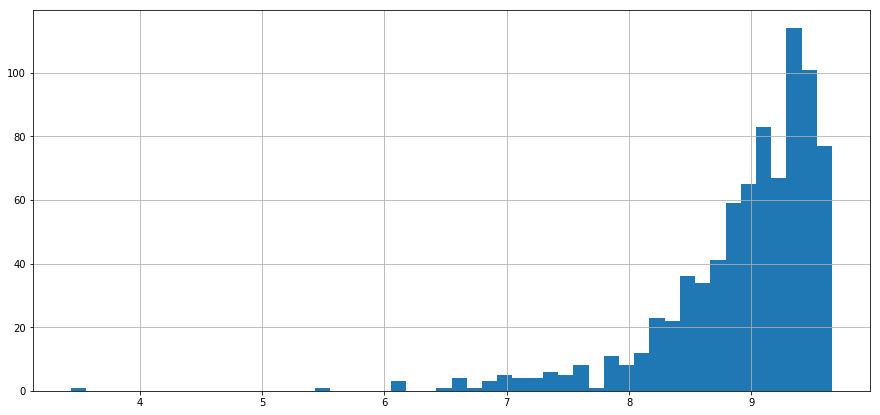

In [32]:
word_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(2, 2))
vz_word = word_vectorizer.fit_transform(global_df['preprocessed_text'])

global_word_tfidf_2gram = dict(zip(word_vectorizer.get_feature_names(), word_vectorizer.idf_))
global_word_tfidf_2gram = pd.DataFrame(columns=['tfidf']).from_dict(dict(global_word_tfidf_2gram), orient='index')
global_word_tfidf_2gram.columns = ['tfidf']

global_word_tfidf_2gram.tfidf.hist(bins=50, figsize=(15,7))

In [33]:
global_word_tfidf_2gram.sort_values('tfidf')

,tfidf
hello help,3.437893
your welcom,5.437744
anyth help,6.087647
like know,6.088397
im sorri,6.111142
...,...
make sound,9.620772
win game,9.620772
standard time,9.646748
pm alarm,9.659993


In [34]:
global_word_tfidf_2gram['tfidf']['hello help']

3.4378928699644273

- local TF-IDF

In [35]:
local_tf_idf_1gram_map = {}
local_tf_idf_2gram_map = {}

    - 1gram

ORDER_PIZZA.txt
PHONE_PLAN_BOT.txt
CONTACT_MANAGER.txt
CHECK_STATUS.txt
CITY_INFO.txt
AUTO_SORT.txt
PROMPT_GENERATOR.txt
GEOGRAPHY.txt
UPDATE_CALENDAR.txt
DECIDER_BOT.txt
APARTMENT_FINDER.txt
GUINESS_CHECK.txt
AGREEMENT_BOT.txt
WEATHER_CHECK.txt
PLAY_TIMES.txt
EVENT_RESERVE.txt
NAME_SUGGESTER.txt
LIBRARY_REQUEST.txt
BUS_SCHEDULE_BOT.txt
MOVIE_LISTINGS.txt
LOOK_UP_INFO.txt
APPOINTMENT_REMINDER.txt
SPORTS_INFO.txt
POLICY_BOT.txt
QUOTE_OF_THE_DAY_BOT.txt
PHONE_SETTINGS.txt
WHAT_IS_IT.txt
WEDDING_PLANNER.txt
GAME_RULES.txt
CATALOGUE_BOT.txt
STORE_DETAILS.txt
SHOPPING.txt
UPDATE_CONTACT.txt
INSURANCE.txt
ALARM_SET.txt
RESTAURANT_PICKER.txt
TIME_ZONE.txt
HOME_BOT.txt
EDIT_PLAYLIST.txt
MUSIC_SUGGESTER.txt
PET_ADVICE.txt
BANK_BOT.txt
PRESENT_IDEAS.txt
HOW_TO_BASIC.txt
SKI_BOT.txt
SCAM_LOOKUP.txt
MAKE_RESTAURANT_RESERVATIONS.txt


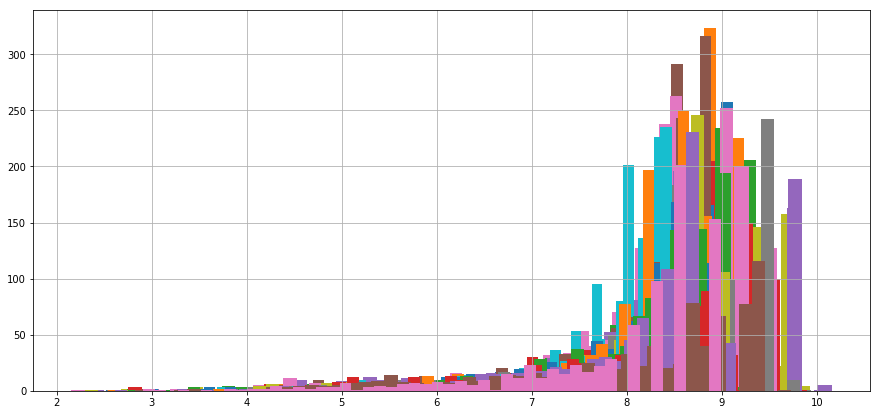

In [36]:
for file in file_list:
    split_file = file.split('/')
    print(split_file[2])
    
    global_df = pd.DataFrame(local_preprocessed_text_map[split_file[2]], columns =['preprocessed_text'])
    
    word_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1, 1))
    vz_word = word_vectorizer.fit_transform(global_df['preprocessed_text'])

    local_word_tfidf_1gram = dict(zip(word_vectorizer.get_feature_names(), word_vectorizer.idf_))
    local_word_tfidf_1gram = pd.DataFrame(columns=['tfidf']).from_dict(dict(local_word_tfidf_1gram), orient='index')
    local_word_tfidf_1gram.columns = ['tfidf']

    local_word_tfidf_1gram.tfidf.hist(bins=50, figsize=(15,7))
    
    local_word_tfidf_1gram.sort_values('tfidf')
    
    local_tf_idf_1gram_map[split_file[2]] = local_word_tfidf_1gram

In [37]:
for file in file_list:
    split_file = file.split('/')
    print(split_file[2])
    
    display(local_tf_idf_1gram_map[split_file[2]].sort_values('tfidf'))

ORDER_PIZZA.txt


,tfidf
pizza,2.517358
order,2.985596
help,3.219382
like,3.349588
hello,3.409139
...,...
pumpkin,9.117909
psychedel,9.117909
provid,9.117909
spicey,9.117909


PHONE_PLAN_BOT.txt


,tfidf
plan,2.565789
help,2.873685
month,3.096246
hello,3.352361
much,3.404547
...,...
35gb,8.933976
365,8.933976
reload,8.933976
regular,8.933976


CONTACT_MANAGER.txt


,tfidf
contact,2.617399
help,2.886466
number,3.082939
hello,3.408544
add,3.458453
...,...
mission,9.636397
michel,9.636397
minut,9.636397
billyaolcom,9.636397


CHECK_STATUS.txt


,tfidf
help,2.931100
hello,3.346830
open,3.494060
check,3.587992
statu,3.839956
...,...
law,8.981619
allow,9.387085
glenn,9.387085
dale,9.387085


CITY_INFO.txt


,tfidf
help,3.065773
hello,3.385048
citi,3.587838
river,3.657797
denver,3.967233
...,...
aeneid,9.596651
hawaii,9.596651
lavinia,9.596651
seri,9.596651


AUTO_SORT.txt


,tfidf
help,2.670399
sort,2.857339
hello,3.353459
chicago,3.952624
sure,4.154402
...,...
756,8.966587
dollar,8.966587
billion,8.966587
numer,8.966587


PROMPT_GENERATOR.txt


,tfidf
help,2.725742
hello,3.327378
parti,3.466215
show,3.661384
good,3.819855
...,...
bug,8.820440
soul,8.820440
teacher,8.820440
infect,8.820440


GEOGRAPHY.txt


,tfidf
help,2.894135
hello,3.369755
countri,3.431197
atlanti,3.932282
georgia,4.023010
...,...
oooook,9.210396
unicycl,9.210396
unif,9.210396
ummmm,9.210396


UPDATE_CALENDAR.txt


,tfidf
meet,2.324656
help,2.981554
hello,3.401882
24th,3.494949
march,3.519910
...,...
nevermind,9.640207
luci,9.927889
handl,9.927889
34th,9.927889


DECIDER_BOT.txt


,tfidf
help,2.751486
hello,3.375500
parti,3.710794
italian,3.764403
go,3.770217
...,...
scenario,8.914800
radioact,8.914800
radgu,8.914800
salsa,8.914800


APARTMENT_FINDER.txt


,tfidf
help,2.860676
apart,2.886111
hello,3.386067
bedroom,3.386067
one,3.644578
...,...
sunshin,8.942895
suppos,8.942895
sur,8.942895
troubl,8.942895


GUINESS_CHECK.txt


,tfidf
help,3.002379
world,3.216370
hello,3.340464
record,3.660085
person,3.980992
...,...
sleep,9.349768
danyangkunshan,9.349768
la,9.572912
field,9.572912


AGREEMENT_BOT.txt


,tfidf
help,3.283646
hello,3.333039
you,3.876956
bot,3.999423
moon,4.013607
...,...
sister,8.955250
basebal,8.955250
goo,8.955250
blow,8.955250


WEATHER_CHECK.txt


,tfidf
help,3.054059
rain,3.308260
hello,3.368580
weather,3.541618
weekend,3.761175
...,...
sweet,9.036735
swerv,9.036735
ta,9.036735
twenti,9.036735


PLAY_TIMES.txt


,tfidf
help,2.929032
hello,3.356223
play,3.634041
show,3.795790
pm,4.065238
...,...
room,9.704779
sale,9.704779
regist,9.704779
yw,9.704779


EVENT_RESERVE.txt


,tfidf
help,3.005264
reserv,3.378868
hello,3.408933
tent,3.862201
game,3.893767
...,...
oy,9.038351
oz,9.038351
uproar,9.038351
packag,9.038351


NAME_SUGGESTER.txt


,tfidf
help,2.728102
name,2.867319
hello,3.376625
boat,3.664940
restaur,3.897623
...,...
presto,8.950679
ole,8.950679
pressur,8.950679
onenam,8.950679


LIBRARY_REQUEST.txt


,tfidf
help,3.039199
book,3.260206
hello,3.390067
late,3.635984
librari,3.873165
...,...
calm,9.247286
profil,9.247286
owl,9.534968
flyer,9.534968


BUS_SCHEDULE_BOT.txt


,tfidf
help,2.892754
bu,2.935916
hello,3.380740
stop,3.554070
subway,3.830730
...,...
lennox,9.117312
lcoation,9.117312
lane,9.117312
ky,9.117312


MOVIE_LISTINGS.txt


,tfidf
movi,2.876291
help,2.952984
hello,3.349175
day,3.662833
theater,3.862568
...,...
strand,9.133000
strang,9.133000
streer,9.133000
300pm,9.133000


LOOK_UP_INFO.txt


,tfidf
help,3.047070
hello,3.371008
tall,3.401724
cloud,3.495934
inform,3.634085
...,...
rememb,8.603898
johnni,8.603898
20th,9.009363
laugh,9.009363


APPOINTMENT_REMINDER.txt


,tfidf
appoint,2.581992
help,2.867949
remind,2.945910
hello,3.384538
sure,3.888642
...,...
aprilt,9.230977
secur,9.230977
secretari,9.230977
assess,9.230977


SPORTS_INFO.txt


,tfidf
game,2.682571
help,3.016489
hello,3.366384
footbal,3.688434
today,3.836388
...,...
santa,9.056744
sanchez,9.056744
san,9.056744
sens,9.056744


POLICY_BOT.txt


,tfidf
help,2.945314
compani,2.995217
polici,3.292694
hello,3.359860
servic,3.665242
...,...
poni,8.830028
sole,8.830028
policy_bot,8.830028
smart,8.830028


QUOTE_OF_THE_DAY_BOT.txt


,tfidf
help,2.955180
quot,3.005632
one,3.322631
hello,3.356962
good,3.582867
...,...
wasnt,8.962764
warn,8.962764
proceed,8.962764
poular,8.962764


PHONE_SETTINGS.txt


,tfidf
help,2.811111
phone,2.887521
vibrat,3.293606
hello,3.385199
disturb,3.539350
...,...
byond,8.886457
calcul,8.886457
car,8.886457
ceas,8.886457


WHAT_IS_IT.txt


,tfidf
help,2.624872
rememb,3.262152
hello,3.356475
book,3.476824
movi,3.645364
...,...
wah,9.383548
worm,9.383548
bum,9.383548
wrestl,9.383548


WEDDING_PLANNER.txt


,tfidf
help,2.531914
wed,3.020866
hello,3.354440
invit,3.918208
plan,3.954456
...,...
suffici,8.958402
rum,8.958402
rule,8.958402
store,8.958402


GAME_RULES.txt


,tfidf
game,2.681913
help,2.714773
hello,3.350589
tag,4.048464
play,4.060383
...,...
solitar,9.688004
bottl,9.688004
read,9.688004
35,9.688004


CATALOGUE_BOT.txt


,tfidf
help,2.920233
book,3.042200
hello,3.320492
copi,3.730641
loan,3.754395
...,...
skip,8.398786
sir,8.398786
silver,8.398786
ti,8.398786


STORE_DETAILS.txt


,tfidf
help,3.007057
hello,3.380621
open,3.791261
bank,3.855540
store,3.874388
...,...
sign,9.340337
df,9.340337
asd,9.340337
sd,9.340337


SHOPPING.txt


,tfidf
help,3.000397
order,3.200909
hello,3.422087
helmet,3.569897
like,3.724047
...,...
mega,9.144582
lawn,9.550048
gum,9.550048
dad,9.550048


UPDATE_CONTACT.txt


,tfidf
contact,2.742079
help,2.757828
name,3.238826
number,3.394404
hello,3.399417
...,...
smartphon,9.098187
smithdgmailcom,9.098187
smithdoctornet,9.098187
smithgmailcom,9.098187


INSURANCE.txt


,tfidf
insur,2.754345
polici,2.755528
help,2.860713
hello,3.338198
number,3.645146
...,...
peter,9.494470
arriv,9.494470
autom,9.494470
reimburs,9.494470


ALARM_SET.txt


,tfidf
alarm,2.346685
help,2.872249
like,3.365442
hello,3.393853
chang,3.624953
...,...
bedroom,10.159468
pew,10.159468
shi,10.159468
app,10.159468


RESTAURANT_PICKER.txt


,tfidf
help,2.852239
restaur,2.995908
hello,3.358509
french,3.791446
find,3.878703
...,...
villa,9.014501
vicin,9.014501
raw,9.014501
papillion,9.014501


TIME_ZONE.txt


,tfidf
time,2.153733
help,2.801039
zone,3.260143
hello,3.341014
new,3.432219
...,...
ph,9.576405
peterbursg,9.576405
pertersburg,9.576405
pennsylvania,9.576405


HOME_BOT.txt


,tfidf
help,2.905970
hello,3.378049
room,3.442641
temperatur,3.503582
like,3.519872
...,...
eye,9.826147
woof,9.826147
foot,9.826147
republ,9.826147


EDIT_PLAYLIST.txt


,tfidf
playlist,2.301553
help,2.834400
hello,3.403010
like,3.455654
music,3.816198
...,...
sprinteen,9.081475
citi,9.081475
classi,9.081475
spanish,9.081475


MUSIC_SUGGESTER.txt


,tfidf
music,2.949525
help,2.966571
hello,3.370605
song,3.715698
good,3.759048
...,...
plini,8.821643
pnk,8.821643
podcast,8.821643
ulver,8.821643


PET_ADVICE.txt


,tfidf
dog,2.950181
help,3.005359
food,3.487574
hello,3.520150
much,3.574585
...,...
switch,8.942895
syrup,8.942895
potato,8.942895
popular,8.942895


BANK_BOT.txt


,tfidf
account,2.540840
help,2.809189
hello,3.385195
transfer,3.534644
bank,3.651681
...,...
percent,8.655627
pend,8.655627
peanut,8.655627
pinpoint,8.655627


PRESENT_IDEAS.txt


,tfidf
help,2.746502
gift,2.919835
hello,3.346916
good,4.022094
birthday,4.132031
...,...
bbq,8.823379
heart,8.823379
princip,9.228844
prime,9.228844


HOW_TO_BASIC.txt


,tfidf
help,2.872585
hello,3.638807
okay,4.039899
ok,4.171190
you,4.310280
...,...
charg,9.069029
well,9.069029
risk,9.069029
relat,9.069029


SKI_BOT.txt


,tfidf
ski,2.608859
help,2.897747
trip,3.368523
hello,3.373171
book,3.404719
...,...
somewher,9.147722
48766,9.147722
rout,9.147722
513,9.147722


SCAM_LOOKUP.txt


,tfidf
help,2.824087
hello,3.363560
number,3.415214
scam,3.428556
email,3.834937
...,...
clinton,9.443493
client,9.443493
school,9.443493
ip,9.443493


MAKE_RESTAURANT_RESERVATIONS.txt


,tfidf
reserv,2.910649
help,2.964971
restaur,3.047140
hello,3.387573
16,3.532813
...,...
share,8.985995
she,8.985995
shell,8.985995
speak,8.985995


In [38]:
local_tf_idf_1gram_map['ORDER_PIZZA.txt']['tfidf']['help']

3.2193823909344412

In [39]:
local_tf_idf_1gram_map['CONTACT_MANAGER.txt']['tfidf']['help']

2.8864662451061442

    - 2-gram

ORDER_PIZZA.txt
PHONE_PLAN_BOT.txt
CONTACT_MANAGER.txt
CHECK_STATUS.txt
CITY_INFO.txt
AUTO_SORT.txt
PROMPT_GENERATOR.txt
GEOGRAPHY.txt
UPDATE_CALENDAR.txt
DECIDER_BOT.txt
APARTMENT_FINDER.txt
GUINESS_CHECK.txt
AGREEMENT_BOT.txt
WEATHER_CHECK.txt
PLAY_TIMES.txt
EVENT_RESERVE.txt
NAME_SUGGESTER.txt
LIBRARY_REQUEST.txt
BUS_SCHEDULE_BOT.txt
MOVIE_LISTINGS.txt
LOOK_UP_INFO.txt
APPOINTMENT_REMINDER.txt
SPORTS_INFO.txt
POLICY_BOT.txt
QUOTE_OF_THE_DAY_BOT.txt
PHONE_SETTINGS.txt
WHAT_IS_IT.txt
WEDDING_PLANNER.txt
GAME_RULES.txt
CATALOGUE_BOT.txt
STORE_DETAILS.txt
SHOPPING.txt
UPDATE_CONTACT.txt
INSURANCE.txt
ALARM_SET.txt
RESTAURANT_PICKER.txt
TIME_ZONE.txt
HOME_BOT.txt
EDIT_PLAYLIST.txt
MUSIC_SUGGESTER.txt
PET_ADVICE.txt
BANK_BOT.txt
PRESENT_IDEAS.txt
HOW_TO_BASIC.txt
SKI_BOT.txt
SCAM_LOOKUP.txt
MAKE_RESTAURANT_RESERVATIONS.txt


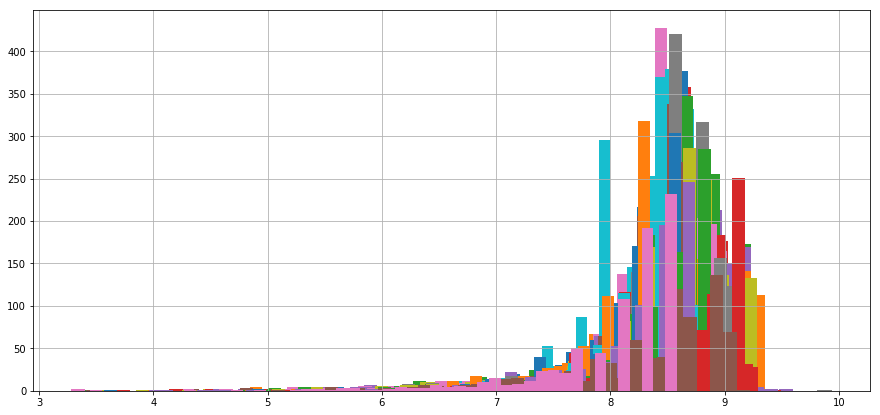

In [40]:
for file in file_list:
    split_file = file.split('/')
    print(split_file[2])
    
    global_df = pd.DataFrame(local_preprocessed_text_map[split_file[2]], columns =['preprocessed_text'])
    
    word_vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(2, 2))
    vz_word = word_vectorizer.fit_transform(global_df['preprocessed_text'])

    local_word_tfidf_2gram = dict(zip(word_vectorizer.get_feature_names(), word_vectorizer.idf_))
    local_word_tfidf_2gram = pd.DataFrame(columns=['tfidf']).from_dict(dict(local_word_tfidf_2gram), orient='index')
    local_word_tfidf_2gram.columns = ['tfidf']

    local_word_tfidf_2gram.tfidf.hist(bins=50, figsize=(15,7))
    
    local_word_tfidf_2gram.sort_values('tfidf')
    
    local_tf_idf_2gram_map[split_file[2]] = local_word_tfidf_2gram

In [41]:
for file in file_list:
    split_file = file.split('/')
    print(split_file[2])
    
    display(local_tf_idf_2gram_map[split_file[2]].sort_values('tfidf'))

ORDER_PIZZA.txt


,tfidf
hello help,3.508437
order pizza,4.049005
larg pizza,4.640572
like order,4.774104
im sorri,5.066124
...,...
sauc chees,8.712444
keep chang,8.712444
johnson street,8.712444
sausag green,8.712444


PHONE_PLAN_BOT.txt


,tfidf
hello help,3.414517
10 month,4.848000
upgrad plan,4.864949
much month,4.908624
free 247,4.908624
...,...
save lot,8.528511
second line,8.528511
like unlimit,8.528511
help updat,8.528511


CONTACT_MANAGER.txt


,tfidf
hello help,3.427137
phone number,4.037975
new contact,4.477342
email address,4.508473
like add,4.914927
...,...
telephon number,9.348715
okay replac,9.348715
perfect delet,9.348715
bobbi ramirez,9.348715


CHECK_STATUS.txt


,tfidf
hello help,3.403148
check statu,4.500502
water park,4.500502
your welcom,5.117387
open septemb,5.167577
...,...
singl day,8.981619
site check,8.981619
septemb 13th,8.981619
extra larg,8.981619


CITY_INFO.txt


,tfidf
hello help,3.424951
life expect,4.481656
like know,4.676670
averag life,4.792630
new york,4.991481
...,...
compar weather,9.191186
know old,9.191186
10 averag,9.191186
colorado area,9.596651


AUTO_SORT.txt


,tfidf
hello help,3.398242
new york,4.831420
help sort,4.847550
date birth,4.932346
your welcom,5.193826
...,...
la honolulu,8.561122
la london,8.561122
citi citi,8.966587
dollar bill,8.966587


PROMPT_GENERATOR.txt


,tfidf
hello help,3.397695
tv show,4.450992
short stori,4.742902
convers starter,4.928619
new tv,4.959710
...,...
man take,8.820440
ex classmat,8.820440
kid time,8.820440
bacon bacon,8.820440


GEOGRAPHY.txt


,tfidf
hello help,3.414339
im sorri,5.308424
your welcom,5.339195
like know,5.484703
countri georgia,5.640864
...,...
south american,9.210396
dark green,9.210396
russia it,9.210396
locat dark,9.210396


UPDATE_CALENDAR.txt


,tfidf
hello help,3.489071
march 24th,3.914174
meet march,4.440330
birch room,4.517732
your welcom,5.406100
...,...
today birch,9.234742
room pm,9.234742
give meet,9.234742
room unavail,9.234742


DECIDER_BOT.txt


,tfidf
hello help,3.403390
make decis,4.907467
japanes restaur,4.916600
help make,4.973219
italian restaur,5.142039
...,...
great warm,8.914800
eat radioact,8.914800
activ social,8.914800
eight ball,8.914800


APARTMENT_FINDER.txt


,tfidf
hello help,3.415452
1200 month,4.567138
bedroom apart,4.840252
help find,4.840252
find apart,4.963213
...,...
find citi,8.537430
find good,8.537430
find perfect,8.537430
place mind,8.537430


GUINESS_CHECK.txt


,tfidf
hello help,3.410123
world record,4.395351
like know,5.011171
person time,5.184654
your welcom,5.238894
...,...
runner olymp,9.349768
run 100m,9.349768
vagu question,9.349768
two half,9.349768


AGREEMENT_BOT.txt


,tfidf
hello help,3.413986
properti moon,5.084049
agreement bot,5.253948
bot useless,5.841734
useless thing,6.010811
...,...
search everyon,8.955250
rental cant,8.955250
sea orang,8.955250
secret im,8.955250


WEATHER_CHECK.txt


,tfidf
hello help,3.447616
rain weekend,4.525876
chanc rain,4.565096
your welcom,5.038534
like know,5.124712
...,...
it 55,8.631270
it 10,8.631270
98 friday,8.631270
low 59,8.631270


PLAY_TIMES.txt


,tfidf
hello help,3.413210
secret miracl,5.285938
phantom opera,5.382856
your welcom,5.391745
waltz invent,5.475515
...,...
class time,9.011631
email deliveri,9.011631
st georg,9.011631
know secret,9.193953


EVENT_RESERVE.txt


,tfidf
hello help,3.489275
circu tent,4.238436
footbal game,4.782738
game sunday,4.935707
im sorri,5.220638
...,...
good book,8.632886
good cost,8.632886
purchas game,8.632886
check make,8.632886


NAME_SUGGESTER.txt


,tfidf
hello help,3.421250
help name,4.680981
kind boat,4.980387
new restaur,5.177918
italian food,5.274378
...,...
papa home,8.950679
panther refer,8.950679
panda girl,8.950679
particular use,8.950679


LIBRARY_REQUEST.txt


,tfidf
hello help,3.429431
im sorri,5.020452
account number,5.276994
credit card,5.291246
like reserv,5.691937
...,...
ill check,9.024142
sorri titl,9.024142
005 book,9.024142
debt eras,9.247286


BUS_SCHEDULE_BOT.txt


,tfidf
hello help,3.407990
bu stop,4.460183
next bu,4.647580
your welcom,5.091961
public transit,5.172500
...,...
stop 51,9.117312
one 30,9.117312
stop 53,9.117312
stop 71,9.117312


MOVIE_LISTINGS.txt


,tfidf
hello help,3.422573
day big,4.096048
715 1045,4.678653
godfath part,4.750974
weekend godfath,4.835715
...,...
main street,8.727535
low theater,8.727535
look anyth,8.727535
movi 9pm,8.727535


LOOK_UP_INFO.txt


,tfidf
hello help,3.450606
im sorri,4.819708
cloud time,5.039071
like know,5.308061
dont inform,5.412051
...,...
movi cloud,9.009363
movi come,9.009363
movi dream,9.009363
movi make,9.009363


APPOINTMENT_REMINDER.txt


,tfidf
hello help,3.416846
dentist appoint,4.824257
remind appoint,4.982481
next tuesday,5.033775
eras appoint,5.079937
...,...
one need,8.825512
good one,8.825512
good night,8.825512
faker drive,8.825512


SPORTS_INFO.txt


,tfidf
hello help,3.427326
footbal game,4.023043
world cup,4.144089
much time,4.351728
time game,5.013693
...,...
cst pm,9.056744
okay tell,9.056744
oppon 40,9.056744
new day,9.056744


POLICY_BOT.txt


,tfidf
hello help,3.416152
health insur,3.993746
compani polici,4.166589
servic anim,4.686893
like know,4.928055
...,...
polici employe,8.830028
month polici,8.830028
polici due,8.830028
month happi,8.830028


QUOTE_OF_THE_DAY_BOT.txt


,tfidf
hello help,3.411744
braveri fashion,4.543923
judg truth,4.625473
truth knowledg,4.645276
william makepeac,4.765562
...,...
caw caw,8.962764
listen listen,8.962764
lil warn,8.962764
ask countri,8.962764


PHONE_SETTINGS.txt


,tfidf
hello help,3.412088
disturb mode,4.306605
phone vibrat,4.327331
turn disturb,4.666950
vibrat rington,4.852217
...,...
pleas meet,8.886457
pleas mainten,8.886457
pleas load,8.886457
pleas today,8.886457


WHAT_IS_IT.txt


,tfidf
hello help,3.398353
mobi dick,4.308374
parti time,4.336902
help rememb,4.604424
whale hunt,4.883738
...,...
stori line,8.978082
ill ask,8.978082
im abl,8.978082
isnt fiction,9.383548


WEDDING_PLANNER.txt


,tfidf
hello help,3.397720
privat island,4.280911
help plan,4.634269
beach privat,4.815267
famili recept,4.906617
...,...
it possibl,8.552937
nfl stadium,8.958402
fairi tale,8.958402
wed 5000,8.958402


GAME_RULES.txt


,tfidf
hello help,3.403870
game tag,4.633884
help game,5.024565
like know,5.253227
free park,5.388454
...,...
good time,9.177179
good point,9.177179
great nice,9.177179
help control,9.177179


CATALOGUE_BOT.txt


,tfidf
hello help,3.401574
onlin copi,4.087987
book loan,4.801474
your welcom,5.536585
loan onlin,5.796097
...,...
paper town,8.398786
paper towel,8.398786
paper roll,8.398786
pay chase,8.398786


STORE_DETAILS.txt


,tfidf
hello help,3.492454
your welcom,5.297285
open 9am,5.370045
nearbi pet,5.859097
like know,5.874601
...,...
support small,8.934872
bee boop,8.934872
suggest store,8.934872
bank use,8.934872


SHOPPING.txt


,tfidf
hello help,3.507415
im sorri,4.686367
coupon code,4.858700
bicycl helmet,4.985699
like order,5.186949
...,...
shop store,8.856900
complet purchas,8.856900
compani return,8.856900
size medium,8.856900


UPDATE_CONTACT.txt


,tfidf
hello help,3.436964
dr smith,4.084224
mr smith,4.138845
smith dr,4.523476
phone number,4.864080
...,...
rain man,8.692722
question help,8.692722
538 423,9.098187
sorri 538,9.098187


INSURANCE.txt


,tfidf
hello help,3.410730
water damag,4.134744
insur polici,4.243944
polici number,4.256257
health insur,4.455356
...,...
first insur,9.206788
coverag fire,9.206788
compani health,9.206788
coverag liabil,9.206788


ALARM_SET.txt


,tfidf
hello help,3.422501
like chang,5.047480
alarm set,5.221403
chang alarm,5.299656
help alarm,5.401577
...,...
ok let,9.243177
dog one,9.243177
cat meow,9.243177
new job,9.466321


RESTAURANT_PICKER.txt


,tfidf
hello help,3.414229
find restaur,4.730915
help find,4.773174
french cuisin,4.787667
authent french,4.832451
...,...
interest one,8.609036
okay steakhous,8.609036
like go,8.609036
good bread,9.014501


TIME_ZONE.txt


,tfidf
time zone,3.282062
hello help,3.398461
new york,3.450628
st petersburg,4.589380
help time,4.606592
...,...
fall hour,9.170940
time provid,9.170940
time pst,9.170940
gmt greenwich,9.170940


HOME_BOT.txt


,tfidf
hello help,3.415973
live room,4.439361
front door,5.107649
your welcom,5.206089
current temperatur,5.371800
...,...
heavi metal,9.133000
room 69,9.133000
heat bedroom,9.133000
tell hous,9.133000


EDIT_PLAYLIST.txt


,tfidf
hello help,3.468347
bruce springsteen,4.332205
new playlist,4.432288
playlist like,5.130231
remov bruce,5.130231
...,...
michael jackson,8.676010
metallica motorhead,8.676010
zumba music,8.676010
80 rock,9.081475


MUSIC_SUGGESTER.txt


,tfidf
hello help,3.407767
help music,5.158081
good song,5.280684
song play,5.420446
your welcom,5.437253
...,...
question song,8.821643
right send,8.821643
right psycho,8.821643
punk aerosmith,8.821643


PET_ADVICE.txt


,tfidf
hello help,3.572257
dog food,4.518049
much space,4.632096
food week,4.760845
pet advic,4.908655
...,...
ordinari dog,8.537430
great apart,8.537430
one theyd,8.537430
dog take,8.537430


BANK_BOT.txt


,tfidf
hello help,3.432572
account number,4.001667
bank account,4.279870
like transfer,4.723802
transfer money,4.894427
...,...
problem give,8.655627
problem 500,8.655627
problem 50,8.655627
process redeposit,8.655627


PRESENT_IDEAS.txt


,tfidf
hello help,3.402844
year old,4.740208
buy gift,4.994738
53rd birthday,5.297019
teddi bear,5.306871
...,...
dog poop,9.228844
exot store,9.228844
he everyth,9.228844
day day,9.228844


HOW_TO_BASIC.txt


,tfidf
hello help,3.684534
time machin,5.058066
im sorri,5.202004
build time,5.578601
design websit,5.603293
...,...
let stand,9.292173
lid bottl,9.292173
inform websit,9.292173
sure burn,9.292173


SKI_BOT.txt


,tfidf
hello help,3.430695
ski trip,3.991545
next weekend,4.101077
ski hill,4.489011
book ski,4.552603
...,...
moment ski,8.742257
moment process,8.742257
miami fl,8.742257
mani ski,8.742257


SCAM_LOOKUP.txt


,tfidf
hello help,3.408610
toni emailerson,5.129344
your welcom,5.300358
unknown number,5.572292
tech support,5.577514
...,...
they steal,9.038028
identifi scam,9.038028
place report,9.038028
variou scam,9.038028


MAKE_RESTAURANT_RESERVATIONS.txt


,tfidf
hello help,3.446694
make reserv,4.271970
im sorri,4.695535
like make,4.960643
tabl 16,5.201805
...,...
expens snooti,8.580530
reserv orang,8.580530
factori mani,8.580530
reserv tomorrow,8.580530


# Graph Data Structure

In [42]:
graph_data = []

In [43]:
for file in file_list:
    split_file = file.split('/')
    print(split_file[2])
    
    paragraph = []
    
    local_preprocessed_text_list = local_preprocessed_text_map[split_file[2]]
    for text in local_preprocessed_text_list:
        tokens = [word for word in nltk.word_tokenize(text)]
        node_list = []
        edge_list = []
        edge_flag = False
        for i in range(0, len(tokens)):
            
            node_tfidf_vector = []
            for file2 in file_list:
                split_file2 = file2.split('/')
                
                node_tfidf = 0
                try:
                    node_tfidf = local_tf_idf_1gram_map[split_file2[2]]['tfidf'][tokens[i]]
                except:
                    #print(tokens[i])
                    node_tfidf = -1
                    
                node_tfidf_vector.append(node_tfidf)
                
            if tokens[i] not in node_list:
                node = [tokens[i], node_tfidf_vector]
                node_list.append(node)
                
                if len(node_list) > 1:
                    
                    edge_counter_vector = []
                    for file2 in file_list:
                        split_file2 = file2.split('/')
                        try:
                            edge_counter = local_word_counter_2gram[split_file2[2]][node_list[i - 1][0] + '-' + node_list[i][0]]
                        except:
                            edge_counter = -1
                        edge_counter_vector.append(edge_counter)
                            
                    edge_list.append([node_list[i - 1], node_list[i], edge_counter_vector])
                    
        paragraph.append([node_list,edge_list, split_file[2]])
    graph_data.append(paragraph)

ORDER_PIZZA.txt
PHONE_PLAN_BOT.txt
CONTACT_MANAGER.txt
CHECK_STATUS.txt
CITY_INFO.txt
AUTO_SORT.txt
PROMPT_GENERATOR.txt
GEOGRAPHY.txt
UPDATE_CALENDAR.txt
DECIDER_BOT.txt
APARTMENT_FINDER.txt
GUINESS_CHECK.txt
AGREEMENT_BOT.txt
WEATHER_CHECK.txt
PLAY_TIMES.txt
EVENT_RESERVE.txt
NAME_SUGGESTER.txt
LIBRARY_REQUEST.txt
BUS_SCHEDULE_BOT.txt
MOVIE_LISTINGS.txt
LOOK_UP_INFO.txt
APPOINTMENT_REMINDER.txt
SPORTS_INFO.txt
POLICY_BOT.txt
QUOTE_OF_THE_DAY_BOT.txt
PHONE_SETTINGS.txt
WHAT_IS_IT.txt
WEDDING_PLANNER.txt
GAME_RULES.txt
CATALOGUE_BOT.txt
STORE_DETAILS.txt
SHOPPING.txt
UPDATE_CONTACT.txt
INSURANCE.txt
ALARM_SET.txt
RESTAURANT_PICKER.txt
TIME_ZONE.txt
HOME_BOT.txt
EDIT_PLAYLIST.txt
MUSIC_SUGGESTER.txt
PET_ADVICE.txt
BANK_BOT.txt
PRESENT_IDEAS.txt
HOW_TO_BASIC.txt
SKI_BOT.txt
SCAM_LOOKUP.txt
MAKE_RESTAURANT_RESERVATIONS.txt


In [44]:
arraygraph_data = np.array(graph_data)

In [45]:
arraygraph_data.shape

(47,)

In [58]:
graph_data[0][0]

[[['hello',
   [3.409138926215914,
    3.352361229546495,
    3.4085441137225017,
    3.346829794791803,
    3.38504752334906,
    3.353458591250332,
    3.3273780719216317,
    3.369754597731376,
    3.401882342271874,
    3.375499538134179,
    3.3860670829951354,
    3.3404636636220584,
    3.333038875509247,
    3.368579807253593,
    3.3562225763978026,
    3.408932554135959,
    3.376625293808241,
    3.3900669335180305,
    3.380740164122782,
    3.3491750362538752,
    3.3710084072962996,
    3.3845379360683423,
    3.366384320651253,
    3.359860459059144,
    3.3569618638721175,
    3.3851990604329623,
    3.3564745319709695,
    3.354439923981381,
    3.3505887844528646,
    3.3204923328498777,
    3.3806208252599395,
    3.422087236590665,
    3.399416879908749,
    3.338197782899741,
    3.393852529781412,
    3.358509256727116,
    3.3410144134433635,
    3.378049457353012,
    3.403010373465141,
    3.3706046726742813,
    3.5201501997715847,
    3.385195196172828,
    3

In [47]:
np.save("graph_data.npy", graph_data)

In [48]:
load_graph_data=np.load("graph_data.npy")

In [49]:
len(load_graph_data)

47